In [1]:
# Import libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import joblib
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from utils import add_car_age

In [2]:
# Load data into dataframes.
car_price_df = pd.read_csv("used_car_price_dataset_extended.csv")
car_price_df.head()

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,NaN,0,No
1,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,NaN,0,Yes
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,Full,1,Yes
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,Full,0,Yes
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,Full,0,Yes


In [3]:
# Check dataframe information.
car_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   make_year           10000 non-null  int64  
 1   mileage_kmpl        10000 non-null  float64
 2   engine_cc           10000 non-null  int64  
 3   fuel_type           10000 non-null  object 
 4   owner_count         10000 non-null  int64  
 5   price_usd           10000 non-null  float64
 6   brand               10000 non-null  object 
 7   transmission        10000 non-null  object 
 8   color               10000 non-null  object 
 9   service_history     7962 non-null   object 
 10  accidents_reported  10000 non-null  int64  
 11  insurance_valid     10000 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 937.6+ KB


In [4]:
# Check statistics.
car_price_df.describe()

,make_year,mileage_kmpl,engine_cc,owner_count,price_usd,accidents_reported
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2009.206900,17.960753,2287.130000,3.003500,7179.754532,0.492200
std,8.373858,5.025486,1291.276927,1.418904,2795.270940,0.694109
min,1995.000000,5.000000,800.000000,1.000000,1000.000000,0.000000
25%,2002.000000,14.540000,1200.000000,2.000000,5176.547500,0.000000
50%,2009.000000,17.970000,1800.000000,3.000000,6961.260000,0.000000
75%,2016.000000,21.352500,3000.000000,4.000000,8993.732500,1.000000
max,2023.000000,35.000000,5000.000000,5.000000,17647.630000,5.000000


In [5]:
# Check for duplicates.
car_price_df.duplicated().sum()

0

In [6]:
# Check null values.
car_price_df.isna().sum()

make_year                0
mileage_kmpl             0
engine_cc                0
fuel_type                0
owner_count              0
price_usd                0
brand                    0
transmission             0
color                    0
service_history       2038
accidents_reported       0
insurance_valid          0
dtype: int64

In [7]:
# Impute null values.
car_price_df['service_history'].fillna(car_price_df['service_history'].mode()[0])
car_price_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   make_year           10000 non-null  int64  
 1   mileage_kmpl        10000 non-null  float64
 2   engine_cc           10000 non-null  int64  
 3   fuel_type           10000 non-null  object 
 4   owner_count         10000 non-null  int64  
 5   price_usd           10000 non-null  float64
 6   brand               10000 non-null  object 
 7   transmission        10000 non-null  object 
 8   color               10000 non-null  object 
 9   service_history     7962 non-null   object 
 10  accidents_reported  10000 non-null  int64  
 11  insurance_valid     10000 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 937.6+ KB


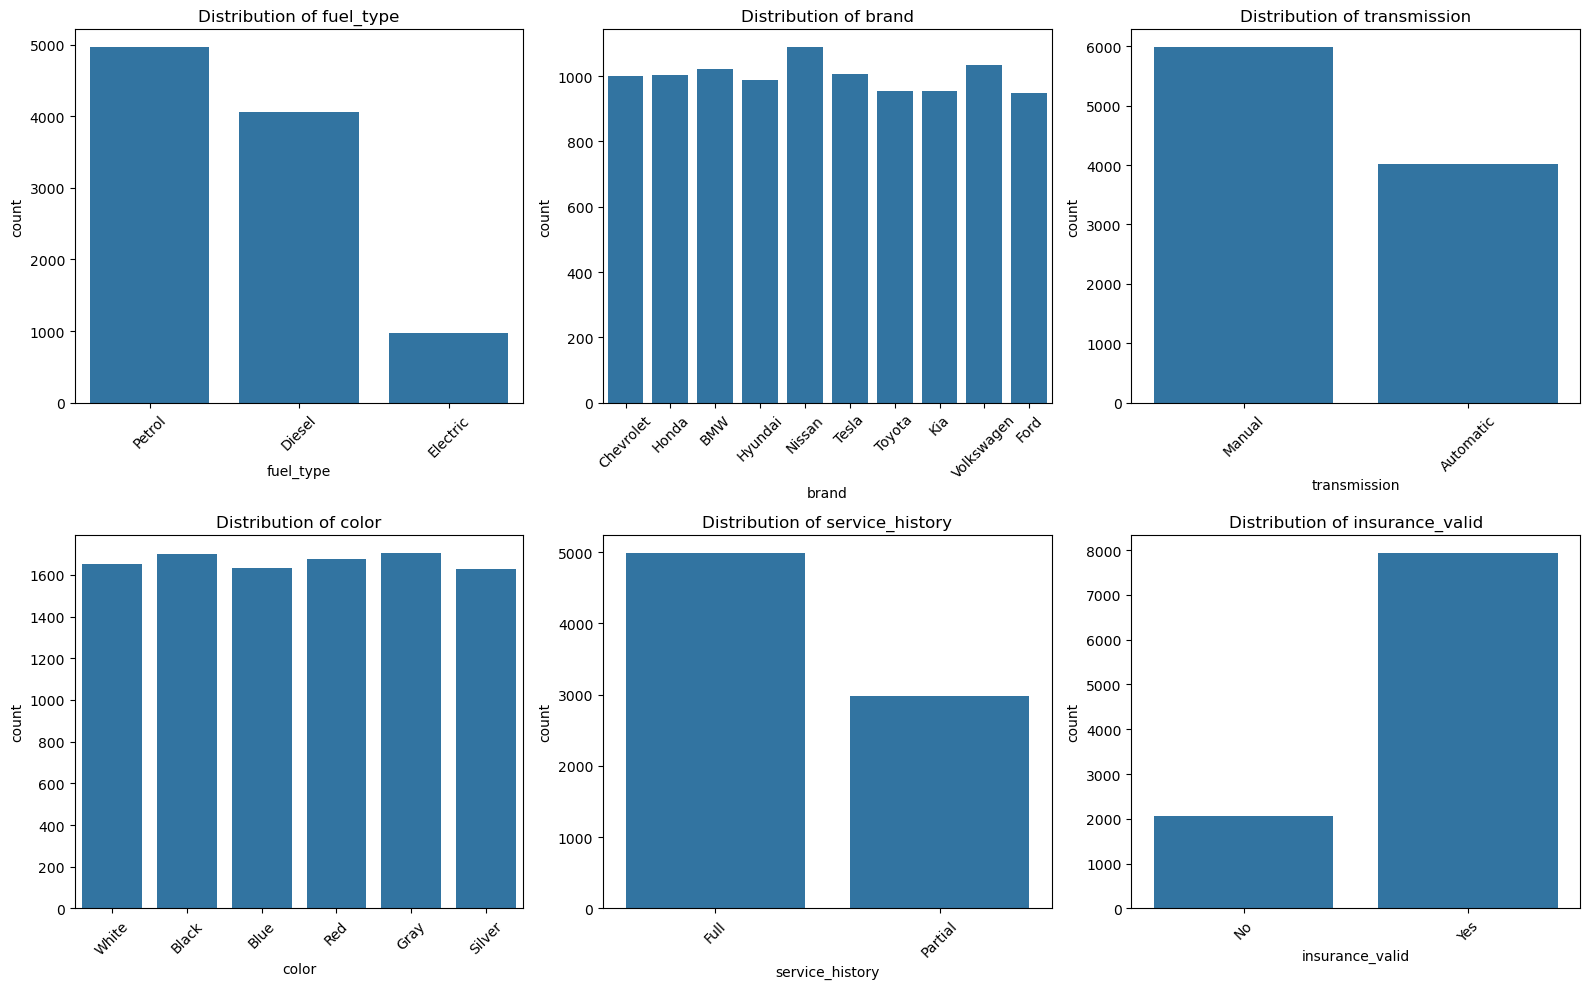

In [8]:
# Visualize categorical columns.
categorical_columns = ['fuel_type', 'brand', 'transmission', 'color', 'service_history', 'insurance_valid']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
axes = axes.flatten()  

for i, column in enumerate(categorical_columns):
    sns.countplot(data=car_price_df, x=column, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].tick_params(axis='x', rotation=45)  

plt.tight_layout()
plt.show()



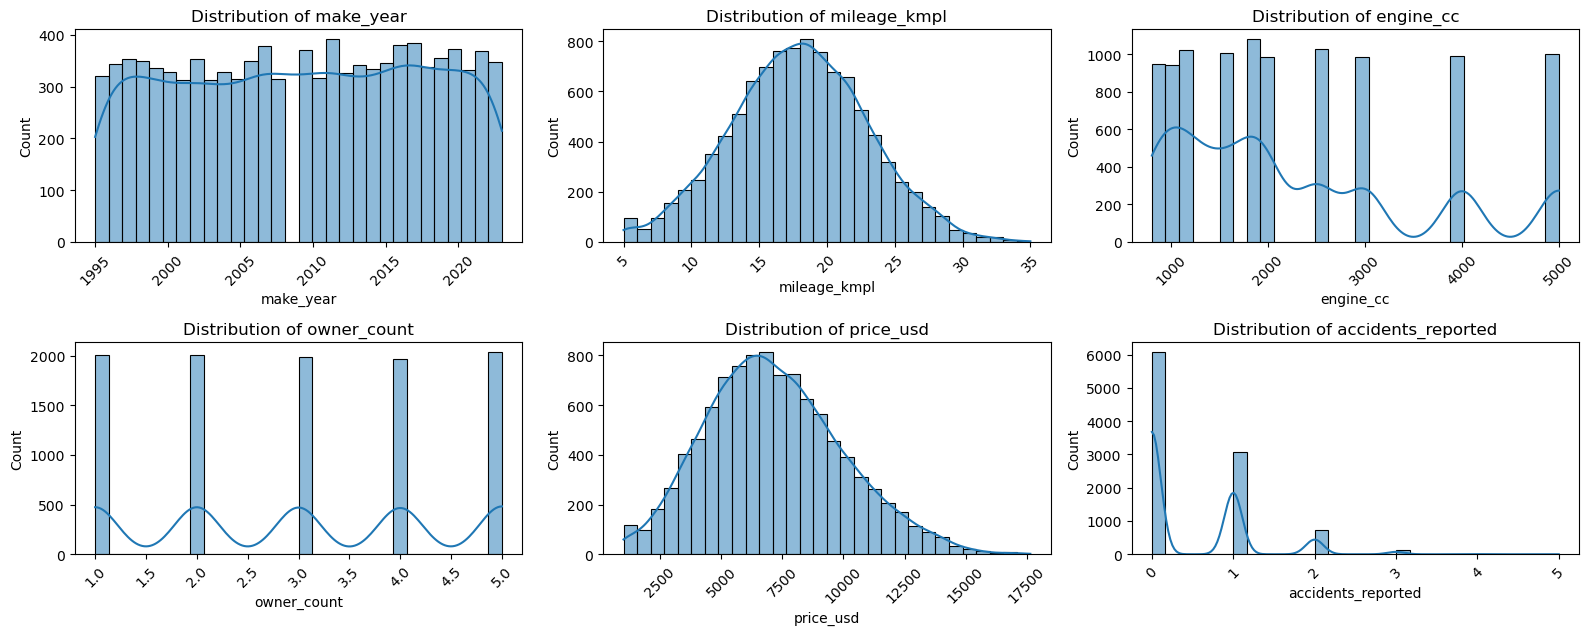

In [9]:
# Visualize numerical columns.
numerical_columns = car_price_df.select_dtypes(include=['int64', 'float64']).columns

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 12))
axes = axes.flatten()

# Plot histograms
for i, column in enumerate(numerical_columns):
    sns.histplot(data=car_price_df, x=column, kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Distribution of {column}')
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

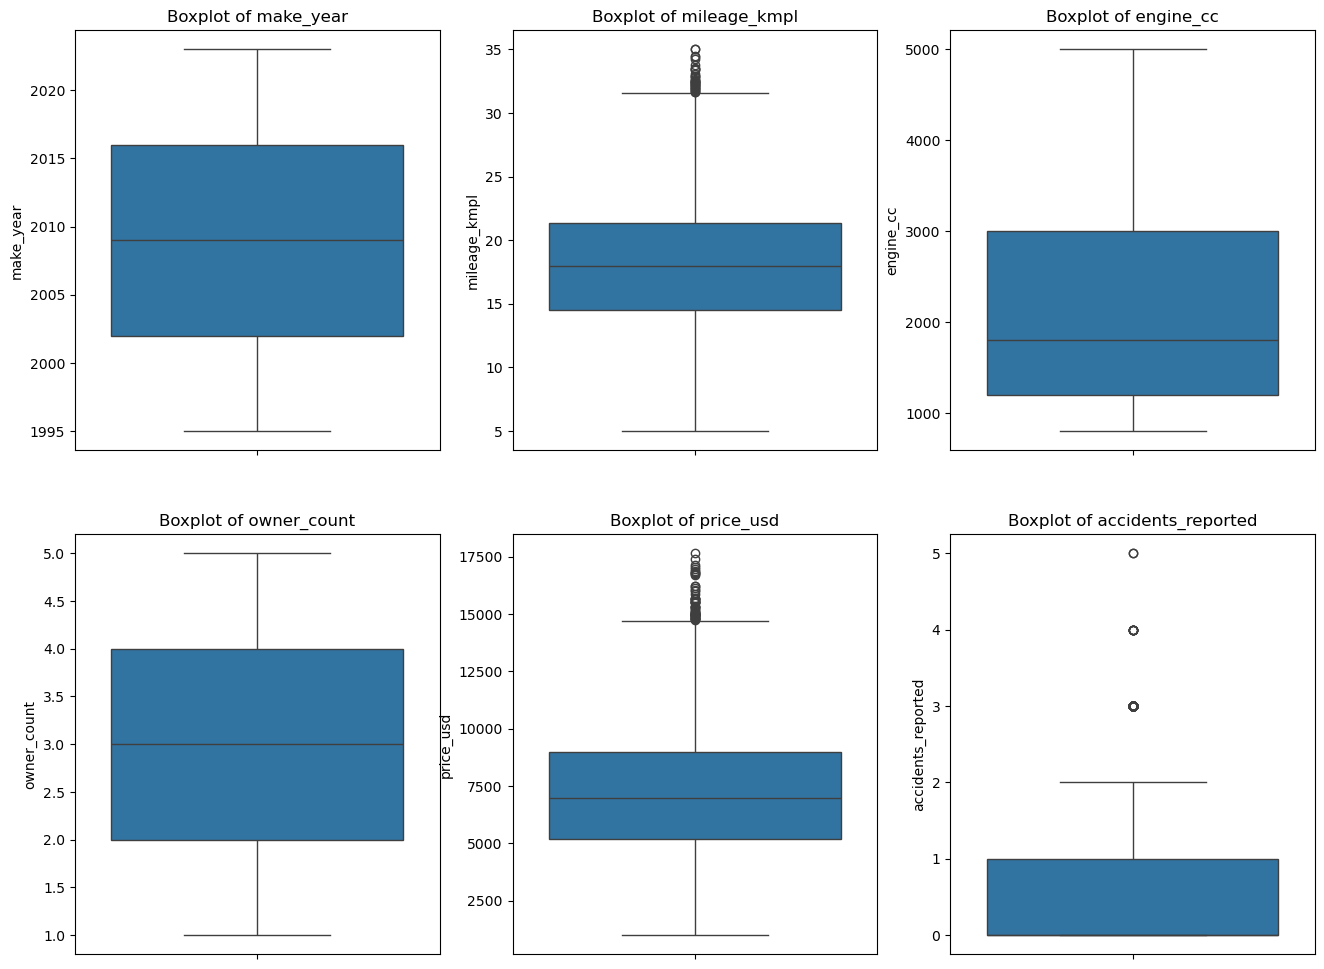

In [10]:
# Visualize outliers.

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))
axes = axes.flatten()
for i, column in enumerate(numerical_columns):
    sns.boxplot(data=car_price_df, y=column, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')


In [11]:
# Perform feature engineering.
current_year = datetime.now().year

# Calculate car age
car_price_df['car_age'] = current_year - car_price_df['make_year']

In [12]:
# Convert categorical features to numeric.
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform categorical features.
encoded_array = encoder.fit_transform(car_price_df[categorical_columns])

# Get feature names
encoded_feature_names = encoder.get_feature_names_out(categorical_columns)

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoded_feature_names, index=car_price_df.index)

# Drop original categorical columns and concatenate encoded ones
car_price_df = car_price_df.drop(columns=categorical_columns)
car_price_df = pd.concat([car_price_df, encoded_df], axis=1)
car_price_df.head()

,make_year,mileage_kmpl,engine_cc,owner_count,price_usd,accidents_reported,car_age,fuel_type_Diesel,fuel_type_Electric,fuel_type_Petrol,...,color_Blue,color_Gray,color_Red,color_Silver,color_White,service_history_Full,service_history_Partial,service_history_nan,insurance_valid_No,insurance_valid_Yes
0,2001,8.17,4000,4,8587.64,0,24,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,2014,17.59,1500,4,5943.50,0,11,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,2023,18.09,2500,5,9273.58,1,2,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,2009,11.28,800,1,6836.24,0,16,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,2005,12.23,1000,2,4625.79,0,20,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [13]:
# Define variables.
X = car_price_df.drop(columns = ['price_usd'])
y = car_price_df['price_usd']

In [14]:
X.columns

Index(['make_year', 'mileage_kmpl', 'engine_cc', 'owner_count',
       'accidents_reported', 'car_age', 'fuel_type_Diesel',
       'fuel_type_Electric', 'fuel_type_Petrol', 'brand_BMW',
       'brand_Chevrolet', 'brand_Ford', 'brand_Honda', 'brand_Hyundai',
       'brand_Kia', 'brand_Nissan', 'brand_Tesla', 'brand_Toyota',
       'brand_Volkswagen', 'transmission_Automatic', 'transmission_Manual',
       'color_Black', 'color_Blue', 'color_Gray', 'color_Red', 'color_Silver',
       'color_White', 'service_history_Full', 'service_history_Partial',
       'service_history_nan', 'insurance_valid_No', 'insurance_valid_Yes'],
      dtype='object')

In [15]:
# Split the dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [16]:
# Scale the features.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear regression

In [17]:
# Train a linear regression model.
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [18]:
# Evaluation.
y_pred = lr.predict(X_test_scaled)

rsquared_test = r2_score(y_test, y_pred)
print(f"R squared : {rsquared_test}")

R squared : 0.8762468761986368


# Random Forest

In [19]:
# Train a random forest regressor model.
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [20]:
# Evaluation.
y_pred_rf = rf.predict(X_test_scaled)
rsquared_test_rf = r2_score(y_test, y_pred_rf)
print(f"R squared : {rsquared_test_rf}")


R squared : 0.851663392599088


### Hyperparameter tuning - Random Forest Regressor

In [21]:
# Define parameters.
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=params, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [22]:
# Best parameters from GridSearchCV.
best_params = grid_search.best_params_
print(f"Best parameters:")
print()
best_params

Best parameters:



{'bootstrap': True,
 'max_depth': 10,
 'max_features': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 300}

In [23]:
# Train model with best parameters.
rf_best = RandomForestRegressor(**best_params, random_state=42, n_jobs=-1)
rf_best.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=10, max_features=None, min_samples_leaf=4,
                      n_estimators=300, n_jobs=-1, random_state=42)

In [24]:
# Evaluation.
y_pred_rf_best = rf_best.predict(X_test_scaled)
rsquared_test_rf_best = r2_score(y_test, y_pred_rf_best)
print(f"R squared : {rsquared_test_rf_best}")

R squared : 0.8575325572120016


# XGBoost Regressor

In [25]:
# Train XGboost regressor model.
xg_model = XGBRegressor()
xg_model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [26]:
# Evaluation.
y_pred_xg = xg_model.predict(X_test_scaled)
rsquared_test_xg = r2_score(y_test, y_pred_xg)
print(f"R squared : {rsquared_test_xg}")


R squared : 0.8482962304191753


### Hyperparameter tuning - XGBoost Regressor

In [27]:
# Define parameters.
params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'min_child_weight': [1, 3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1, 2]
}


grid_search_xg = GridSearchCV(estimator=XGBRegressor(random_state = 42), param_grid=params, cv=5, scoring='r2', n_jobs=-1)
grid_search_xg.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0], 'gamma': [0, 0.1],
                         'learning_rate': [0.05, 0.1], 'max_depth': [3, 5],
                         'min_child_weight': [1, 3], 'n_estimators': [100, 200],
                         'reg_alpha': [0, 0.1], 'reg_lambda': [1, 2],
                         'subsample': [0.8, 1.0]},
             scoring='r2')

In [28]:
# Best parameters from GridSearchCV.
best_params = grid_search_xg.best_params_
print(f"Best parameters:")
print()
best_params

Best parameters:



{'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.05,
 'max_depth': 3,
 'min_child_weight': 3,
 'n_estimators': 200,
 'reg_alpha': 0.1,
 'reg_lambda': 1,
 'subsample': 0.8}

In [29]:
# Train model with best parameters.
xg_best = XGBRegressor(**best_params, random_state=42, n_jobs=-1)
xg_best.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [30]:
# Evaluation.
y_pred_xg_best = xg_best.predict(X_test_scaled)
rsquared_test_xg_best = r2_score(y_test, y_pred_xg_best)
print(f"R squared : {rsquared_test_xg_best}")

R squared : 0.8734650926107629


# Build a Pipeline

In [38]:
# Load data
car_price_df = pd.read_csv("used_car_price_dataset_extended.csv")

# Define variables.
X = car_price_df.drop(columns = ['price_usd'])
y = car_price_df['price_usd']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Separate column types.
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocessing for numerical data.
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data.
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

# Feature engineer "car_age" column and Wrap it in a transformer
add_car_age_transformer = FunctionTransformer(add_car_age)

# Combine all preprocessing.
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

# Final pipeline with model.
model_pipeline = Pipeline(steps=[
    ('add_car_age', add_car_age_transformer),
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(**best_params, random_state=42, n_jobs=-1))
])

# Train the pipeline.
model_pipeline.fit(X_train, y_train)

# Save the full pipeline.
joblib.dump(model_pipeline, 'car_price_model_pipeline.pkl')

['car_price_model_pipeline.pkl']